# 1. Subproblem

Let $x$ be the sequence of words we are given.

> $x = [\texttt{the}, \texttt{dog}, \texttt{barks}]$.

Let POS be the set of all possible parts of speech.

> POS = $\{D, N, V\}$.

$dp(p, i)$ is the probability of the most likely POS tag sequence for the suffix $w[i:]$ starting with POS tag $p$.

> $dp(N, 1) = .5$ and $dp(V, 1) = .1$

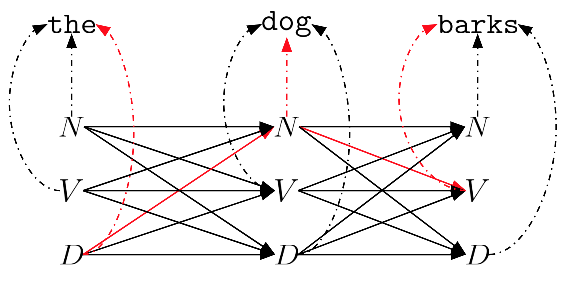

In [41]:
import numpy as np
from keras.preprocessing.image import load_img

img = load_img('Forward.png')
new_size = np.array(img.size) // 2
img.resize(size=new_size.tolist())

# 2. Guess

We will guess the next POS tag.

# 3. Recurrence

$$
\
dp(y, i) = 
\
\begin{cases}
    p(x_i|y), & \text{if } i = n \\
    p(x_i|y) \cdot \max \limits_{y' \in POS} [p(y'|y) \cdot dp(y', i+1)], & \text{otherwise}
\end{cases}
$$

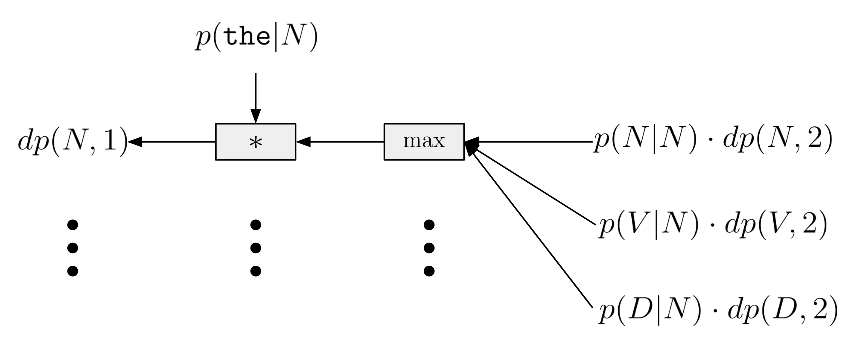

In [50]:
import numpy as np
from keras.preprocessing.image import load_img

img = load_img('Recurrence.png')
new_size = np.array(img.size) // 2
img.resize(size=new_size.tolist())

## Emission Probabilities

$E[i, j] = E[y, x] = p(x|y)$

In [67]:
import pandas as pd

E = [[.05, .8, .15],
     [.01, .3, .69],
     [.9, .05, .05]]

df = pd.DataFrame(E)
df.index, df.columns = ['N', 'V', 'D'], ['the', 'dog', 'barks']
df.index.name, df.columns.name = 'POS', 'Word'
df

Word,the,dog,barks
POS,,,
N,0.05,0.80,0.15
V,0.01,0.30,0.69
D,0.90,0.05,0.05


## Transition Probabilities

In [69]:
import pandas as pd

T = [[.3, .3, .3],
     [.4, .1, .5],
     [.4, .4, .1]]

df = pd.DataFrame(T)
df.index, df.columns = ['N', 'V', 'D'], ['N', 'V', 'D']
df.index.name, df.columns.name = 'POS', 'POS'
df

POS,N,V,D
POS,,,
N,0.3,0.3,0.3
V,0.4,0.1,0.5
D,0.4,0.4,0.1


## Top-Down DP

In [85]:
V = ['the', 'dog', 'barks']
POS = ['N', 'V', 'D']
Y = [0, 1, 2]

def dp(p, i):
    if i == n-1:
        return E[p][i]
    else:
        best = -float('inf')
        for j, y in enumerate(Y):
            prob = dp(y, i+1)
            if prob > best:
                best = prob
                k = j
        return T[p][k] * best

x = [0, 1, 2]
n = len(x)
for y in Y:
    prob = dp(y, 0)
    print(prob)

0.08279999999999998
0.13799999999999998
0.0276


## Bottom-Up DP

In [89]:
m = len(POS)

dp = [[0]*n for _ in range(m)]
for i in range(m):
    dp[i][n-1] = E[i][n-1]
    
for j in reversed(range(n-1)):
    for i in range(m):
        dp[i][j] = max(dp[k][j+1] for k in range(m))

for row in dp:
    print(row)

[0.69, 0.69, 0.15]
[0.69, 0.69, 0.69]
[0.69, 0.69, 0.05]


# 4. Topological Ordering

Right to left (suffixes of increasing size).

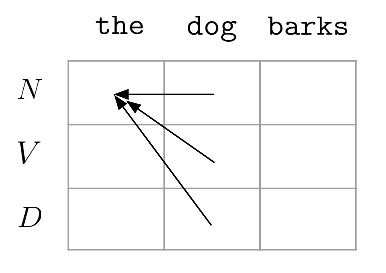

In [52]:
import numpy as np
from keras.preprocessing.image import load_img

img = load_img('Tabular.png')
new_size = np.array(img.size) // 2
img.resize(size=new_size.tolist())

# 5. Original Problem

$$
\
\max \limits_{p \in POS} dp(p, 1)
$$

*The POS with the largest probability starting with POS tag p*.

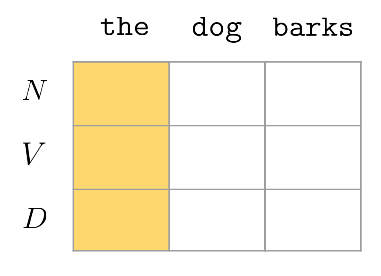

In [55]:
import numpy as np
from keras.preprocessing.image import load_img

img = load_img('Goal.png')
new_size = np.array(img.size) // 2
img.resize(size=new_size.tolist())